
## Redes Neuronales 7103
# Tarea 1
Josué Irad Galindo De la Serna

9-Nov-2021


#### 1. Diseña una red neuronal y encuentra los pesos para computar la funcion  A XNOR B definida como
$$ (A ∧ B)OR(¬A ∧ ¬B) $$

#### Solución:
La arquitectura que vamos a utilizar es una red de 2 capas:

1. La **capa de entrada** de dos neuronas que recibe los valores que vamos a evaluar.

2. 1 **capa oculta**, la capa oculta permitirá al perceptrón multicapa resolver este pronblema no separable solo con una linea. Se esperaría que más neuronas aquí harían que el trabajo sea más rápido pero como la capa de entrada es sólo de dos neuronas, en este caso no queremos aumentar la dimension y usaremos sólo dos para esta capa. 

3. la **Capa de salida**, como sólo buscamos una respuesta binaria, una sola neurona será suficiente. regresará el valor del XOR entre las dos entradas.

Además, como sólo nos interesan los valores binarios, usaremos la función escalón como función de activación.

Los valores de verdad son:

|A |B |~A|~B|(A ∧ B)|(~A ∧ ~B)| (A ∧ B) v (¬A ∧ ¬B)| 
|--|--|--|--|-----|-------|--------------------|
|0 |0 |1 |1 |0    |1      |1                   |
|0 |1 |1 |0 |0    |0      |0                   |
|1 |0 |0 |1 |0    |0      |0                   |
|1 |1 |0 |0 |1    |0      |1                   |

Para encontrar los pesos pensamos en que la capa oculta representa las operaciones $(A ∧ B)$ y $(¬A ∧ ¬B)$, cada neurona sería una compuerta lógica idividual. 
<div>
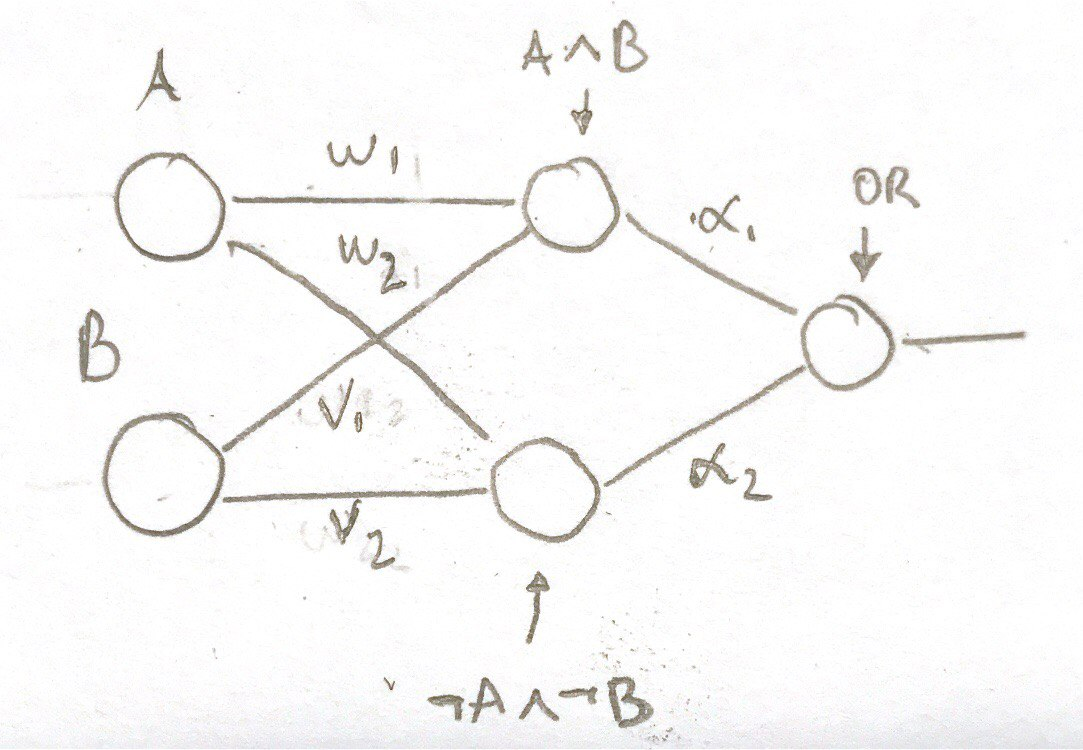
</div>


De este modo, si tenemos un umbral $\theta_1$, queremos que para la primera neurona de la capa oculta $(A,B)\rightarrow (A∧B)$, entonces: 

$$(0,0)\rightarrow A w_1 +B w_2 = 0 \implies 0 < \theta_1 $$
$$(1,0)\rightarrow A w_1 +B w_2 = w_1 \implies w_1 < \theta_1 $$
$$(0,1)\rightarrow A w_1 +Bw_2 = w_2 \implies w_1 < \theta_1 $$
$$(1,1)\rightarrow A w_1 +Bw_2 = w_1+w_2 \implies \theta_1<w_1+w_2$$

Entonces si el umbral es $\theta_1 = 0.5$

Elegimos los pesos $w_1 = 0.4$ , $w_2 = 0.4$

Por otro lado, para la segunda neurona, debe ocurrir $(A,B)\rightarrow (¬A∧¬B)$, entonces: 

$$(0,0)\rightarrow A v_1 +B v_2 = 0 \implies \theta_2 < 0 $$
$$(1,0)\rightarrow A v_1 +B v_2 = v_1 \implies v_1<\theta_2 $$
$$(0,1)\rightarrow A v_1 +B v_2 = v_2 \implies v_2< \theta_2 $$
$$(1,1)\rightarrow A v_1 +B v_2 = v_1+v_2 \implies v_1+v_2<\theta_2$$

Si el umbral es $\theta_2=-0.5$

Elegimos los pesos $v_1 = -1$ , $v_2 = -1$

Finalmente, en la neurona de salida quermos que las respuestas de la capa anterior $x_1$ y $x_2$ den como resultado un $(x_1 OR x_2)$, entonces:

$$(0,0)\rightarrow x_1 \alpha_1 +x_2 \alpha_2 = 0 \implies  \theta_{s}<0 $$
$$(1,0)\rightarrow x_1 \alpha_1 +x_2 \alpha_2 = \alpha_1 \implies \theta_{s}<\alpha_1 $$
$$(0,1)\rightarrow x_1 \alpha_1 +x_2 \alpha_2 = \alpha_2 \implies \theta_{s}<\alpha_2 $$
$$(1,1)\rightarrow x_1 \alpha_1 +x_2 \alpha_2 = \alpha_1+\alpha_2 \implies \theta_s<\alpha_1+\alpha_2$$

Si tomamos al humbral de salida como $\theta_s = 0.5$

Elegimos los pesos $\alpha_1 = 1$ y $\alpha_2 = 1$

### Construcción de la  red
Usando lo anterior, construiremos la red a contunuación

In [1]:
#importamos las librerias 
import numpy as np

from numpy import array, arange, zeros, dot, hstack
from numpy.random import randn

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import pcolor


In [2]:
#Función de activación 
escalon = lambda X: [1 if x>=0 else 0 for x in X]
#Usamos la clase Perceptrón multicapa vista en clase:
class pmc(object):
    def __init__(self, A, fact ):
        ni, nh, no = A
        #pesos
        self.Wh = randn(ni,nh)
        self.Ws = randn(nh,no)
        #capas
        self.H = zeros((nh,))
        self.O = zeros((no,))
        self.f  = fact
    def ff(self, X):
        #capa oculta
        #integracion
        self.H = dot(X,self.Wh)
        #activacion
        self.H = hstack( (1,self.f(self.H) ) )
        #capa salida
        #integracion
        self.O = array(dot(self.H,self.Ws))
        #activacion
        self.O = self.f(array( [self.O] ))
        return self.O
    def set_pesos(self,Wh,Wo):
        self.Wh = Wh
        self.Ws = Wo
    def get_pesos(self):
        return(self.Wh, self.Ws)

Los humbrales están considerados como un nodo de sesgo

In [3]:
#creamos la Red con los pesos que elegimos y los umbrales

P = pmc([2,2,1], escalon) # 2 de entrada, 2 en la oculta y 1 de salida

WV = array([[-0.5,0.5],[0.4,-1],[0.4,-1]])
#los humbrales se agregan como un nodo extra de sesgo con pesos -\theta
Alph = array([-0.5, 1,1])
P.set_pesos(WV,Alph)

In [4]:
#Cada entrada tiene un nodo de sesgo 
X = [[1,0,0],
     [1,0,1],
     [1,1,0],
     [1,1,1]]

for x in X:
    print( "(",x[1],",",x[2],") ->",P.ff(x))
    

( 0 , 0 ) -> [1]
( 0 , 1 ) -> [0]
( 1 , 0 ) -> [0]
( 1 , 1 ) -> [1]


Así obtenemos lo que esperábamos según la tabla de verdad 

#### 2. Ajustar un modelo logístico al dataset de las medias lunas (el dataset lo debes generar con los par ́ametros especificados)
    M, y = make moons ( nsamples =500, noise =0.1 , randomstate =1234 )
    plt.scatter (M[ : , 0 ] , M[ : , 1 ] , c=y )

#### Solución :

In [5]:
#Antes que nada, importamos las librerias
import matplotlib
%matplotlib inline

from sklearn.linear_model    import LogisticRegression
from sklearn.datasets        import make_moons
from sklearn.datasets        import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix

from matplotlib              import pyplot as plt

import pandas as pd
import numpy as np

from numpy import dot

In [6]:
#Además incluimos las funciones vistas en clase 


def agrega_bias(X):
    n,d = X.shape
    u = np.ones((n,1))
    return np.hstack((u,X))

def estandariza(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

def normaliza(X):
    rg = np.amin(X,axis=0) - np.amax(X,axis=0)
    return (X+X.min(axis=0))/rg

def loglikelihood(H,y,th):
    return (-np.dot(y,np.log(H)) - np.dot((1-y),np.log(1-H)))

def sigmoide(z):
    return 1/(1 + np.exp(-z))

def score(th,X):
    return sigmoide(np.dot(X,th))

def gradiente(w,X,y):
    h = sigmoide(np.dot(X,w))
    z = h.T - y
    gr = np.dot(X.T, z.T)
    return gr
    
def grad_desc(X,y,iters, a=0.01,t=100, tol=1e-4):
    #gr = lambda w, X, y: dot(X.T, (sigmoide(w.T,X.T) - y).T)
    n, d = X.shape
    pesos = np.random.ranf((1,d))
    w = pesos[-1]
    #print(pesos)
    h  = sigmoide(np.dot(X,w))
    j  = loglikelihood(h,y,w)
    costos = [j]
    for i in range(iters):
        gr = gradiente(w,X,y)
        w -= a*gr
        pesos  = np.vstack((pesos,w))
        h  = sigmoide(np.dot(X,w))
        j  = loglikelihood(h,y,w)
        costos.append(j)
        if(i%t==0 or j < tol):
            print('{0}:{1}'.format(i,j))
        if(j<tol):
            break
    return w, pesos, costos



Establecemos ahora el Data set

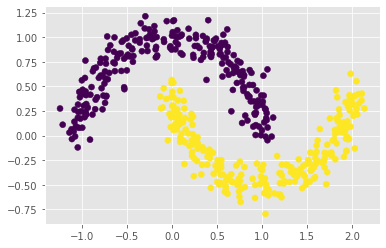

In [7]:
M,y = make_moons(n_samples=500, noise=0.1, random_state=1234 )
plt.scatter(M[:,0], M[:,1], c=y)

Una forma de hacerlo es con un seno o un coseno

Buscamos una forma de transformar este conjunto a uno tal que podamos separarlo con una recta. 

Observamos que una función que puede separar a los conjuntos es un polinomio de grado impar o con un seno o coseno. Por simplicidad pensaremos en un seno. Queremos que esté centrado en el medio de nuesrto sistema, entonces el cambio de coordenadas tendrá una traslación hacia la derecha. Para que quede bien centrado debe trasladarse hasta $x_0 = 0.5$

Proponemos lo siguiente,

$$ u = \sin(\pi(x-x_0)) $$
$$ v = y $$

Notamos que la función $y = a \sin(x-x_0) + b$ se transforma en $v = au + b$, una recta.

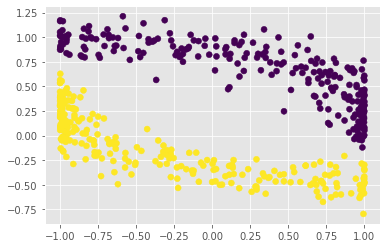

In [8]:
X = np.zeros_like(M)
def cambio(p,q):
    return np.sin(np.pi*(p-0.5)),q

X[:,0] , X[:,1] = cambio(M[:,0],M[:,1])

plt.scatter(X[:,0], X[:,1], c=y)

In [9]:
#Entrenamos
X = normaliza(X)
X = agrega_bias(X)
Mt, Mp, yt, yp = train_test_split(X, y)
wf, W, J = grad_desc(Mt,yt,1000,0.1)


0:1372.9162788290257
100:3.3595839149869082
200:2.8452888922305233
300:2.4892512586254956
400:2.225263370549233
500:2.0201472538693768
600:1.855261551163041
700:1.7192465772508125
800:1.6047459508376816
900:1.5067648703541159


In [10]:
wf

array([-19.89637294,  18.11068016,  40.93017295])

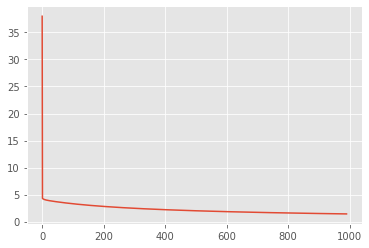

In [11]:
plt.plot(J[10:])

In [12]:
#Verificamos
h = sigmoide(np.dot(Mp,wf))
S = loglikelihood(h,yp, wf)
print("Erorr {0}".format(S/2))

print(confusion_matrix(np.round(h), yp))



Erorr 0.4451472102184378
[[66  0]
 [ 0 59]]


Vemos que clasifica masomenos bien, aún hay algo de error. Vamos a probar con todo el conjunto de datos: 

<ipython-input-13-0ce406797557>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,np.sin(3*(p-0.5)),q])


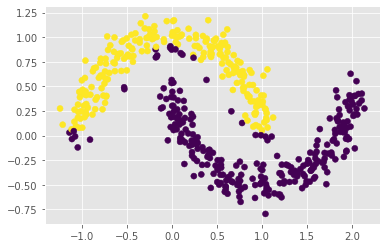

In [13]:
def cambio_arr(p,q):
    return np.array([1,np.sin(3*(p-0.5)),q])

W = cambio_arr(M[:,0],M[:,1]) #todos los puntos originales
Z = score(W,wf) 
Z = np.round(Z)  #clasificación  según el modelo 

plt.scatter(M[:,0],M[:,1],c=Z)

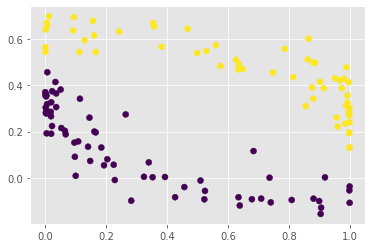

In [14]:
#Sólo los datos de prueba resultan así
Zp = np.round(sigmoide(np.dot(Mp,wf)))

plt.scatter(Mp[:,1],Mp[:,2],c=Zp)

In [15]:
from sklearn.metrics          import classification_report
print(classification_report(yp,Zp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        59

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



Los datos de prueba muestran un modelo perfecto, con recall, precision y f1-score todos iguales a 1, pero la cosa cambia cuando queremos ver qué ocurre con el conjunto de todos los datos 

<ipython-input-16-9551db1e2bfe>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(P,Q,Zw,cmap=cm,alpha=0.2)


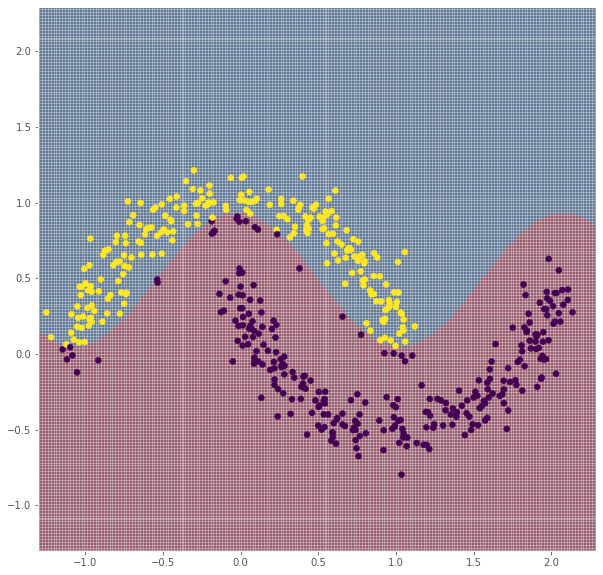

In [16]:
h=0.01
P=np.arange(-1-0.3,2+0.3,h)
Q=np.arange(-1-0.3,2+0.3,h)
Zw=np.zeros((len(P),len(Q)))

fig=plt.figure(figsize=(10,10))
for p in range(len(P)):
    for q in range(len(Q)):
        x,y=P[p],Q[q]
        sc=score(cambio_arr(x,y),wf)
        #print(sc)
        Zw[q,p]=np.round(sc)
cm=plt.cm.RdBu
plt.pcolor(P,Q,Zw,cmap=cm,alpha=0.2)
plt.scatter(M[:,0],M[:,1],c=Z)

#### 3.  Dataset de iris: Escoger la proyección que mejor convenga para clasificar a los ejemplos en 1: Iris setosa, 0: No setosa

Primero cargamos los datos 

In [65]:
from sklearn.datasets        import load_iris
datos_iris = load_iris()
#print(datos_iris["DESCR"])

In [66]:
#print(datos_iris["DESCR"])

In [67]:
X, y= datos_iris['data'], datos_iris['target']
attrb = datos_iris.feature_names

In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

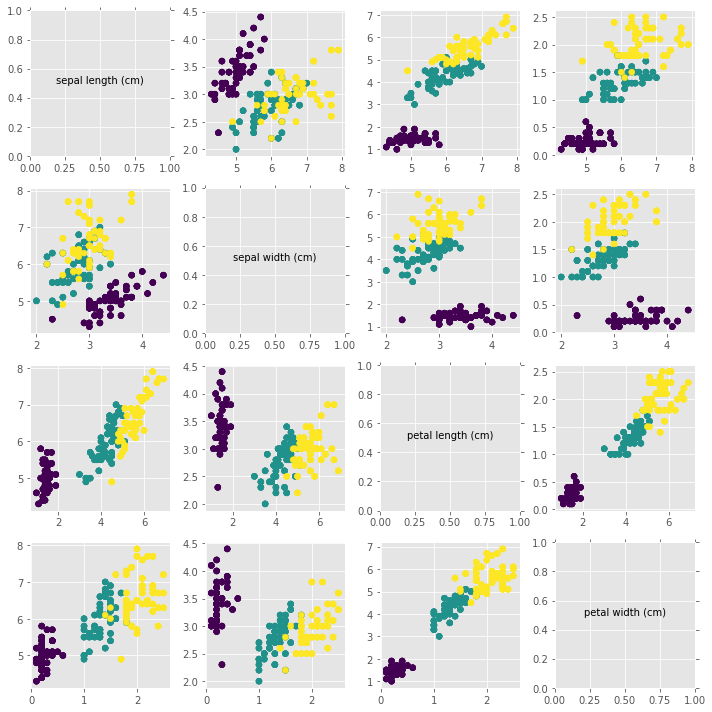

In [69]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i,j]
        if (i==j):
            ax.tick_params(
                axis='both',which='both',
                bottom='off',top='off',
                labelbottom='off',
                left='off',right='off',
                labelleft='off'
            )
            ax.text(0.5,0.5,attrb[i],horizontalalignment='center')
        else:
            ax.scatter(X[:,i],X[:,j],c=y)
            ax.scatter(X[:,i],X[:,j],c=y)
            ax.scatter(X[:,i],X[:,j],c=y)
fig.tight_layout()
plt.show()

Para hacer la clasificacion binaria, usaremos el largo y ancho de los pétalos. Esperamos que las setosas tengan ámbos parámetros chicos.  

In [70]:
#Escojemos los datos
D = np.array(X[:,2:4]) #  las últimas 2 columnas son 
             #los datos de la longitud y el ancho de las hojas
d = np.array([0 if color==0 else 1 for color in y]) 

In [71]:
D = normaliza(D)
D = agrega_bias(D)
Dt, Dp, dt, dp = train_test_split(D, d)
wf, W, J = grad_desc(Dt,dt,15000,0.05, t=1000)

0:123.00626169708275
1000:0.5420962542036691
2000:0.29766128639712347
3000:0.20896204316698597
4000:0.16232505796132818
5000:0.133325344225459
6000:0.11345158295501016
7000:0.09893486230947195
8000:0.08784117388166647
9000:0.07907268434206466
10000:0.071958473136251
11000:0.06606469491743061
12000:0.06109798741552537
13000:0.05685265510543869
14000:0.05318007202515786


Graficamos el error:


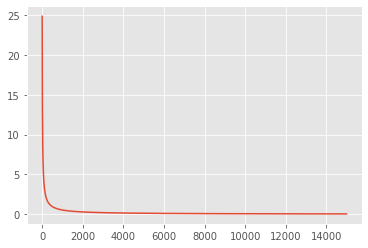

In [72]:
plt.plot(J[10:])


Graficamos las predicciones de la red:

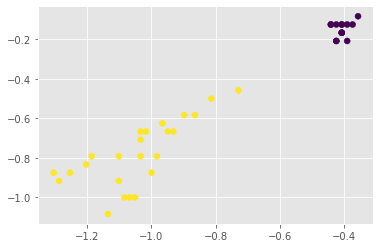

In [73]:
#Z = np.dot(Dp,wf) 
Z = np.round(sigmoide(np.dot(Dp,wf)))  #clasificación  según el modelo 

plt.scatter(Dp[:,1],Dp[:,2],c=Z)

Los datos de prueba quedaron bien clasificados. 

<ipython-input-74-011b8cc23c60>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(P,Q,Zw,cmap=cm,alpha=0.2)


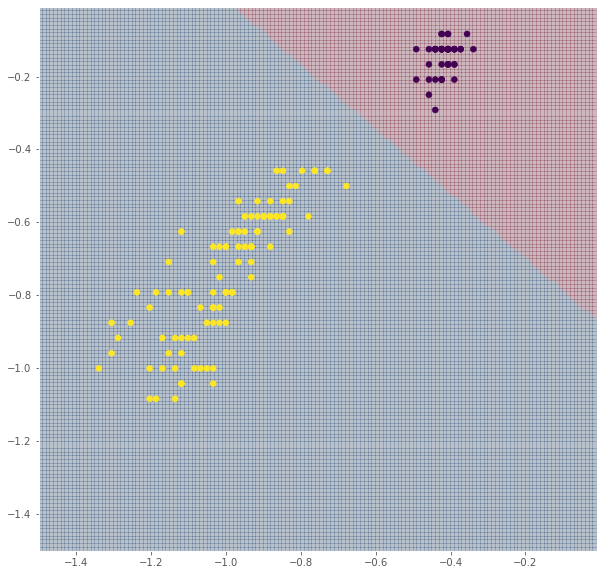

In [74]:
h=0.01
P=np.arange(-1.5,0,h)
Q=np.arange(-1.5,0,h)
Zw=np.zeros((len(P),len(Q)))

fig=plt.figure(figsize=(10,10))
for p in range(len(P)):
    for q in range(len(Q)):
        x,y=P[p],Q[q]
        sc=sigmoide(np.dot(np.array([1,x,y]),wf))
        #print(sc)
        Zw[q,p]=np.round(sc)
cm=plt.cm.RdBu
plt.pcolor(P,Q,Zw,cmap=cm,alpha=0.2)
Ztot = np.round(sigmoide(np.dot(D,wf)))  #clasificación  según el modelo 

plt.scatter(D[:,1],D[:,2],c=Ztot)

#### 4. Genera la matriz de confusión para el mejor valor de treshhold con base en tu curva ROC. ¿Qué valores de precisión y recall obtuviste?

#### Solución:

Comenzamos calculado la matriz de confusión de los datos de prueba del los datos anteriores

In [75]:
#La matriz de confusión que obtenemos del problema anterior

pred = sigmoide(np.dot(Dp,wf))
S = loglikelihood(pred,dp, wf)

print("Erorr {0}".format(S/2)) #mostramos el error 

print(confusion_matrix(np.round(pred), dp)) #Matriz de confusión

Erorr 0.005399746112665035
[[14  0]
 [ 0 24]]


In [76]:
len(pred),len(dp)

(38, 38)

Usando la implementación de sklearn tenemos la siguinte gráfica

thresholds = [2.00000000e+00 1.00000000e+00 9.93727764e-01 9.59334345e-04
 4.79672271e-04 2.59377106e-04 1.98365610e-04 1.40240906e-04
 9.91460999e-05 1.33886414e-05]


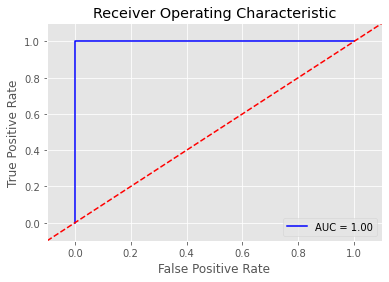

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(dp, pred)# Generating
print("thresholds =", thresholds)
roc_auc = roc_auc_score(dp, pred)# Calculating Area Under the Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1.1], [-0.1, 1.1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Funciona bastante bien. Tenemos los siguientes valores para la Presición, Sensibilidad y Especificidad. 

In [78]:
print(classification_report(dp,np.round(pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        24

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Resultó un ajuste perfecto. Esto es muy raro, pero así pasó. Puede deberse a que el conjunto de datos de prueba es muy pequeño o que está muy bien separado (unos datos muy "bonitos"). No nos dá demasiada información del modelo en general. Siendo así, obtenemos presición y recall iguales a 1.

#### 5. Usando el conjunto de datos de iris, construye una red neuronal que clasifique las tres variedades de flores usando una función de activación softmax en la última capa. Una vez que diseñes la red a usar, debes mostrar la proyección de los estímulos de entrada en la capa intermedia en un scatter plot.

#### Solución:

Vamos a utilizar una red de 3 capas.

1. La **capa de entrada** de 4 neuronas que recibe los valores correspondientes a cada una de las variables que tenemos.

2. 1 **capa oculta**, se usan 6 neuronas. Se hizo la prueba con 4 y 5 también, pero se optó por utilizar 6 pues la clasificación es la mejor de las 3 (quizá por ser más neuronas o quizá por ser múltiplo de 3). 

3. la **Capa de salida**, queremos clasificar en 3 grupos, por lo que tendremos 3 neuronas de salida, para las cuales, esperamos que la que tenga el mayor valor de probabilidad sea la categoría que esperamos.

Además, como sólo nos interesan los valores binarios, usaremos la función simoide como función de activación.

In [79]:
# - - coding: utf- 8 - 
#Comenzamos importanto las librerías y funciones necesarias 
import pandas as pd
import numpy as np 

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import StandardScaler
from sklearn.preprocessing    import MultiLabelBinarizer
from sklearn.metrics          import confusion_matrix

from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers  import Dense 

In [80]:
'''
Función para crear un modelo que recibe como argumentos
ni = # de capas de entrada 
ne = lista con el número de neuronas de las capas escondidas (ordenadas),
     donde el primer elemento es el más cercano a la capa de entrada
no = numero de capas de salida     

ni_fact = funcipon de activación en la capa de entrada 
            'sigmoid', 'relu', 'softmax'
ne_fact = funcion de activación en las capa ocultas
no_fact = funcion de activación en la capa de salida
'''

def create_model(ni=2,ne=[4],no=1,ni_fact = 'sigmoid',ne_fact = 'relu',no_fact = 'softmax'):
    model = Sequential()
    model.add(Dense(ne[0], input_dim=ni, activation=ni_fact))
    
    if len(ne)>=2:
        for i in range(len(ne[1:])):
            #print(type(ne[i+1]),ne[i+1])
            model.add(Dense(ne[i+1], activation=ne_fact))
    else:
        print("solo hay 1 capa oculta")
        
    model.add(Dense(no,activation=no_fact))
    model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
    
    return model

Utilizaremos los datos de iris, entonces, queremos que los datos de salida sean vectores de 3 dimensiones que arrojen 0 en las categorías que no queremos y en las que sí. 
Las categorías son:

                
1. Primera coordenada: Iris-Setosa  -> 0
2. Segunda coordenada: Iris-Versicolour -> 1
3. Tercera coordenada: Iris-Virginica -> 2

In [81]:
def clasif(y):
    outp = np.zeros((len(y),3))  
    for i in range(len(y)):
        if y[i]==0:
            outp[i,0] = 1;
        elif y[i]==1:
            outp[i,1] = 1;
        else:    
            outp[i,2] = 1;
    return outp        
            
X, y= datos_iris['data'], datos_iris['target']
X = normaliza(X) ##### Esto faltaba
#X = agrega_bias(X)
attrb = datos_iris.feature_names    
Clasif = clasif(y)

In [82]:
#Separamos los datos en conjunto de entrenamiento y de prueba:
Xtr,Xts,ytr,yts = train_test_split(X,Clasif)
print(Xtr.shape,ytr.shape)

print(Xts.shape,yts.shape)

(112, 4) (112, 3)
(38, 4) (38, 3)


In [83]:
#Creamos el modelo 
ni = 4 #neuronas en la capa de entrada 
ne = [6] #neuronas en las capas ocultas
no = 3 #neuronas de la capa de salida 

Net1 = create_model(ni,ne,no)

solo hay 1 capa oculta


In [84]:
Net1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [85]:
#Evaluamos para ver cómo se desempeña en el principio:
prev_predicts = Net1.predict(Xts)
y_pred=np.round(prev_predicts) 

#h = sigmoide(np.dot(Dp,wf))
#S = loglikelihood(h,dp, wf)

matrix = confusion_matrix(yts.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

[[10  0  4]
 [ 0  0 12]
 [ 0  0 12]]


Notamos que en principio todo está mal clasificado. Ahora entrenemos a la red.

In [86]:
#Entrenamos con 500 epocas
Net1.fit(Xtr,ytr,epochs = 700, verbose = 1)

Epoch 1/700
4/4 [==============================] - 0s 913us/step - loss: 1.1724 - accuracy: 0.3393
Epoch 2/700
4/4 [==============================] - 0s 845us/step - loss: 1.1662 - accuracy: 0.3393
Epoch 3/700
4/4 [==============================] - 0s 905us/step - loss: 1.1590 - accuracy: 0.3393
Epoch 4/700
4/4 [==============================] - 0s 1ms/step - loss: 1.1520 - accuracy: 0.3393
Epoch 5/700
4/4 [==============================] - 0s 875us/step - loss: 1.1459 - accuracy: 0.3393
Epoch 6/700
4/4 [==============================] - 0s 744us/step - loss: 1.1401 - accuracy: 0.3393
Epoch 7/700
4/4 [==============================] - 0s 994us/step - loss: 1.1346 - accuracy: 0.3393
Epoch 8/700
4/4 [==============================] - 0s 1ms/step - loss: 1.1299 - accuracy: 0.3393
Epoch 9/700
4/4 [==============================] - 0s 657us/step - loss: 1.1248 - accuracy: 0.3393
Epoch 10/700
4/4 [==============================] - 0s 882us/step - loss: 1.1208 - accuracy: 0.3393
Epoch 11/700


4/4 [==============================] - 0s 661us/step - loss: 0.8830 - accuracy: 0.7232
Epoch 165/700
4/4 [==============================] - 0s 750us/step - loss: 0.8812 - accuracy: 0.7143
Epoch 166/700
4/4 [==============================] - 0s 844us/step - loss: 0.8795 - accuracy: 0.7054
Epoch 167/700
4/4 [==============================] - 0s 701us/step - loss: 0.8779 - accuracy: 0.6964
Epoch 168/700
4/4 [==============================] - 0s 859us/step - loss: 0.8763 - accuracy: 0.6964
Epoch 169/700
4/4 [==============================] - 0s 682us/step - loss: 0.8746 - accuracy: 0.6875
Epoch 170/700
4/4 [==============================] - 0s 783us/step - loss: 0.8729 - accuracy: 0.6875
Epoch 171/700
4/4 [==============================] - 0s 705us/step - loss: 0.8711 - accuracy: 0.6875
Epoch 172/700
4/4 [==============================] - 0s 676us/step - loss: 0.8696 - accuracy: 0.6964
Epoch 173/700
4/4 [==============================] - 0s 678us/step - loss: 0.8677 - accuracy: 0.6964
Epoc

4/4 [==============================] - 0s 927us/step - loss: 0.6258 - accuracy: 0.8304
Epoch 327/700
4/4 [==============================] - 0s 769us/step - loss: 0.6246 - accuracy: 0.8214
Epoch 328/700
4/4 [==============================] - 0s 662us/step - loss: 0.6234 - accuracy: 0.8304
Epoch 329/700
4/4 [==============================] - 0s 725us/step - loss: 0.6221 - accuracy: 0.8482
Epoch 330/700
4/4 [==============================] - 0s 1ms/step - loss: 0.6207 - accuracy: 0.8661
Epoch 331/700
4/4 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.8661
Epoch 332/700
4/4 [==============================] - 0s 752us/step - loss: 0.6182 - accuracy: 0.8661
Epoch 333/700
4/4 [==============================] - 0s 735us/step - loss: 0.6169 - accuracy: 0.8750
Epoch 334/700
4/4 [==============================] - 0s 784us/step - loss: 0.6157 - accuracy: 0.8661
Epoch 335/700
4/4 [==============================] - 0s 602us/step - loss: 0.6146 - accuracy: 0.8661
Epoch 33

4/4 [==============================] - 0s 734us/step - loss: 0.4790 - accuracy: 0.9732
Epoch 488/700
4/4 [==============================] - 0s 858us/step - loss: 0.4782 - accuracy: 0.9732
Epoch 489/700
4/4 [==============================] - 0s 690us/step - loss: 0.4776 - accuracy: 0.9732
Epoch 490/700
4/4 [==============================] - 0s 686us/step - loss: 0.4768 - accuracy: 0.9732
Epoch 491/700
4/4 [==============================] - 0s 743us/step - loss: 0.4761 - accuracy: 0.9732
Epoch 492/700
4/4 [==============================] - 0s 960us/step - loss: 0.4754 - accuracy: 0.9732
Epoch 493/700
4/4 [==============================] - 0s 694us/step - loss: 0.4747 - accuracy: 0.9732
Epoch 494/700
4/4 [==============================] - 0s 689us/step - loss: 0.4740 - accuracy: 0.9732
Epoch 495/700
4/4 [==============================] - 0s 666us/step - loss: 0.4734 - accuracy: 0.9732
Epoch 496/700
4/4 [==============================] - 0s 977us/step - loss: 0.4727 - accuracy: 0.9732
Epoc

Epoch 568/700
4/4 [==============================] - 0s 831us/step - loss: 0.4260 - accuracy: 0.9732
Epoch 569/700
4/4 [==============================] - 0s 705us/step - loss: 0.4254 - accuracy: 0.9732
Epoch 570/700
4/4 [==============================] - 0s 685us/step - loss: 0.4247 - accuracy: 0.9732
Epoch 571/700
4/4 [==============================] - 0s 902us/step - loss: 0.4241 - accuracy: 0.9732
Epoch 572/700
4/4 [==============================] - 0s 854us/step - loss: 0.4235 - accuracy: 0.9732
Epoch 573/700
4/4 [==============================] - 0s 732us/step - loss: 0.4229 - accuracy: 0.9732
Epoch 574/700
4/4 [==============================] - 0s 725us/step - loss: 0.4223 - accuracy: 0.9732
Epoch 575/700
4/4 [==============================] - 0s 983us/step - loss: 0.4217 - accuracy: 0.9732
Epoch 576/700
4/4 [==============================] - 0s 898us/step - loss: 0.4211 - accuracy: 0.9732
Epoch 577/700
4/4 [==============================] - 0s 708us/step - loss: 0.4205 - accurac

In [87]:
#Evaluamos 
Net1.evaluate(Xts,yts)

2/2 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.9474


[0.3493584096431732, 0.9473684430122375]

In [88]:
#Calculamos la matriz de confusión:
new_predicts = Net1.predict(Xts)
y_pred=np.round(new_predicts) 

matrix = confusion_matrix(yts.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

[[14  0  0]
 [ 0 10  2]
 [ 1  0 11]]


La matriz de confusión es casi diagonal, sólo tenemos un error entre las clases que no son Setosas, lo que es esperado, pues si obervamos las gráficas del inciso anterior, éstas no tienen una clara divisón.

In [89]:
#Extraeremos ahora los pesos por capa
first_layer_weights  = Net1.layers[0].get_weights()[0]
first_layer_biases   = Net1.layers[0].get_weights()[1]
#second_layer_weights = Net1.layers[1].get_weights()[0]
#second_layer_biases  = Net1.layers[1].get_weights()[1]

In [90]:
#operamos los datos como salida de la capa de entrada con los datos de prueba
out_first_layer = sigmoide(np.dot(Xts, first_layer_weights) + first_layer_biases)


In [91]:
colmat = np.round(out_first_layer)

In [92]:
H = out_first_layer 

Para mostrar todas las posibles salidas de la primera capa, como son 4 parámetros, graficaremos cada 2 como se hizo para graficar los datos de antes 

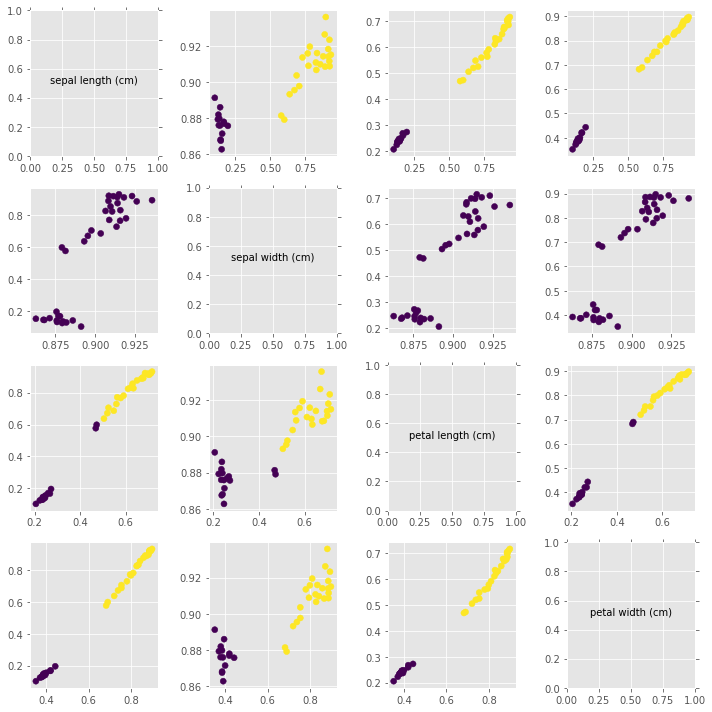

In [93]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i,j]
        if (i==j):
            ax.tick_params(
                axis='both',which='both',
                bottom='off',top='off',
                labelbottom='off',
                left='off',right='off',
                labelleft='off'
            )
            #label = ["1st neuron","2dn neuron","3rd neuron","4th neuron"] 
            ax.text(0.5,0.5,attrb[i],horizontalalignment='center')
        else:
            ax.scatter(H[:,i],H[:,j],c=colmat[:,i])
            #ax.scatter(H[:,i],H[:,j],c=yts) 

fig.tight_layout()
plt.show()

Ahora vamos a visualizarlo usando reducción de dimensión de 4 a 2 

In [94]:
from numpy.linalg import eigh, eig
from numpy        import cov, dot
from numpy        import argsort
#Principal Component Analysis para reducir la dimensión
def pca(datos, dim=2):
    m,n = datos.shape
    D   = datos[:]; D -= datos.mean(axis=0)
    R   = cov(D, rowvar=False)
    evals, evecs = eig(R)
    idx   = argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    evecs = evecs[:, :dim]
    return dot(evecs.T, D.T).T, evals, evecs



In [95]:
Hpca, var, base = pca(H) #default dim=2

In [96]:
print(var)

[3.76566499e-01 2.59461115e-03 8.97363089e-05 8.24464669e-05
 2.98581901e-05 2.94771342e-06]


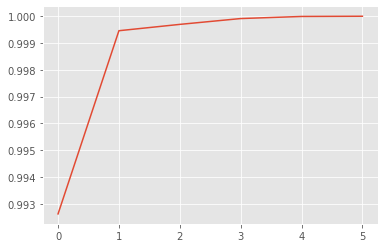

In [97]:
cumvar = np.array([x/sum(var) for x in var]).cumsum()
plt.clf()
plt.plot(cumvar)

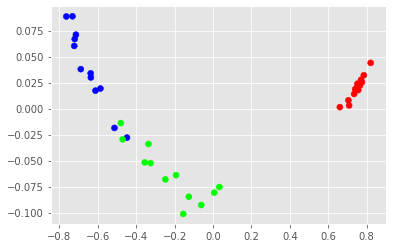

In [98]:
#La reducción es a 2 dimensiones, tomamos los primeros 2:
plt.scatter(Hpca[:,0], Hpca[:,1], c=yts) 
         #Nota: este coloreado no representa nada que se obtuviera del modelo (en particular de la primera capa),
         #Es el coloreado de la clasificación que esperamos al final de la red

#### 6. Ajusta un modelo multilogit, el cual es la generalizaci ́on de la regresión logística pero se conoce como regresión logit multinomial, ¿les recuerda algo a softmax?. 

Usaremos skleran para el modelo multilogit 

In [99]:
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split
#L, l= datos_iris['data'], datos_iris['target']


In [100]:
#Seguimos usando los datos de iris:
#Usaremos los mismos datos para ajustar el modelo 
#################################
"""
Funcion para transformar la clasificación de la red ytr y yts
(que son arreglos de vectores de dimensión 3),
a un arreglo unidimensional de 0s, 1s y 2s
"""
def colores(y):
    col = []
    for clasif in y:
        if clasif[0] == 1.0:
            col.append(0) 
        elif clasif[1] == 1.0:    
            col.append(1)
        else:
            col.append(2)
            
    return np.array(col)  
##################################
#Todos los datos
L = X
l = y

In [101]:
#Datos separados:
Ltr = Xtr
Lts = Xts

ltr = colores(ytr)
lts = colores(yts)

Iris_model = LogisticRegression(multi_class = "multinomial",penalty = "none")

In [102]:
#Entrenamos
Iris_model.fit(Ltr,ltr)

LogisticRegression(multi_class='multinomial', penalty='none')

In [103]:
#Veamos cómo se desempeña
l_pred = Iris_model.predict(Lts)
l_pred

array([2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1,
       0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0])

Graficamos las proyecciones de la predicción

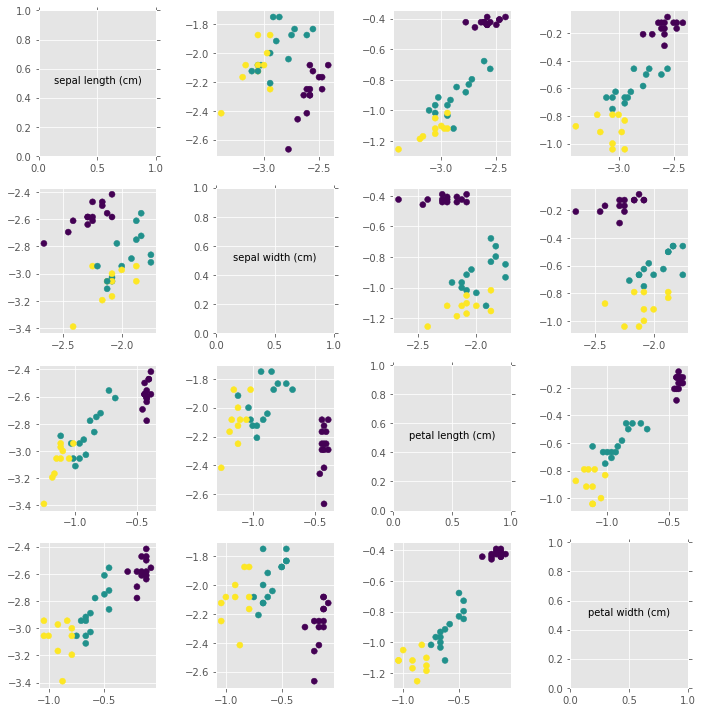

In [104]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4,4, figsize=(10,10))
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i,j]
        if (i==j):
            ax.tick_params(
                axis='both',which='both',
                bottom='off',top='off',
                labelbottom='off',
                left='off',right='off',
                labelleft='off'
            )
            ax.text(0.5,0.5,attrb[i],horizontalalignment='center')
        else:
            ax.scatter(Lts[:,i],Lts[:,j],c=l_pred) #coloración de las predicciones
            
fig.tight_layout()
plt.show()

Graficamos las proyecciones reales

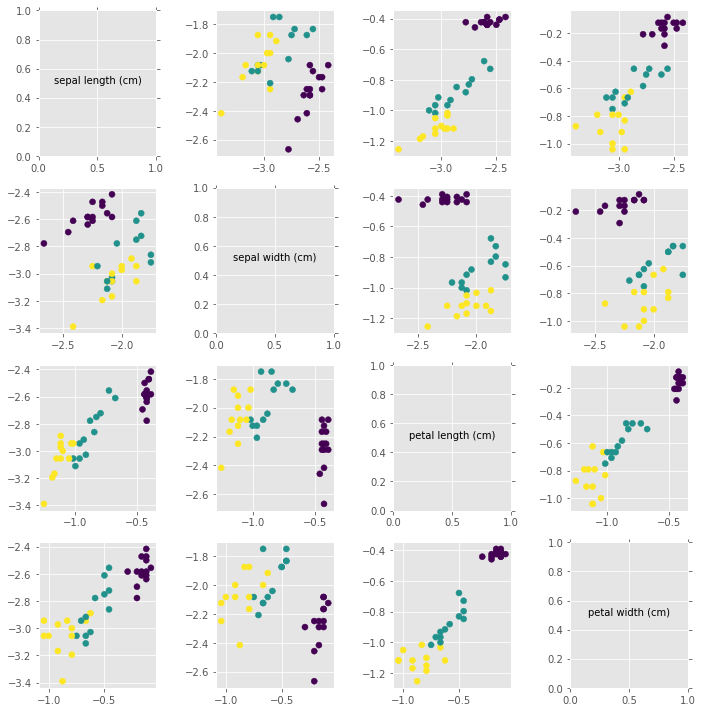

In [105]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4,4, figsize=(10,10))
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i,j]
        if (i==j):
            ax.tick_params(
                axis='both',which='both',
                bottom='off',top='off',
                labelbottom='off',
                left='off',right='off',
                labelleft='off'
            )
            ax.text(0.5,0.5,attrb[i],horizontalalignment='center')
        else:
            ax.scatter(Lts[:,i],Lts[:,j],c=lts) #usamos aquí la coloración de referencia

fig.tight_layout()
plt.show()

In [106]:
#Evaluamos con los datos de prueba:
Iris_model.score(Lts,lts)

0.9473684210526315

In [107]:
#Ahora con todos los datos:
Iris_model.score(L,l)

0.9866666666666667

La regresión logística por sí sola hace una clasificación binaria unicamente, a diferencia de softmax que permite tener una clasificación con más de 2 clases. Ajustar un modelo multinomial logístico le concede al modelo las virtudes de clasifiación en más de 2 clases pues genera múltiples divisiones del espacio. 

#### 7. Genera las matrices de confusión para los parámetros óptimos que encontraste, tanto para la red neuronal como para regresión miltilogit y compara ambos modelos.  ¿Cuál se desempeña mejor? ¿Te sorprenden los resultados obtenidos? Discute brevemente tu respuesta.

In [108]:
#función para sacar la matriz de confusión
from sklearn.metrics          import confusion_matrix

#### Regresión Multilogit

In [109]:
print("Matriz de confusión\n")
print(confusion_matrix(lts,l_pred),"\n")
print("Reporte de clasificación\n")
print(classification_report(lts,l_pred))

Matriz de confusión

[[14  0  0]
 [ 0 12  0]
 [ 0  2 10]] 

Reporte de clasificación

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      1.00      0.92        12
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



#### Red neuronal 

In [110]:
net_pred=np.round(Net1.predict(Lts)) 
net_p = colores(net_pred)

print("Matriz de confusión\n")
print(confusion_matrix(lts,np.array(net_p)),"\n") 
print("Reporte de clasificación\n")
print(classification_report(lts,net_p))

Matriz de confusión

[[14  0  0]
 [ 0 10  2]
 [ 0  0 12]] 

Reporte de clasificación

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.83      0.91        12
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



Ambos resultaron clasificar casi perfectamente al conjunto de prueba. Intenetaremos evaluar ahora con todo el conjunto de datos

#### Regresión Multilogit _ todos los datos 

In [111]:
print("Matriz de confusión\n")
l_tot_pred = Iris_model.predict(L)
print(confusion_matrix(l,l_tot_pred),"\n")
print("Reporte de clasificación\n")
print(classification_report(l,l_tot_pred))

Matriz de confusión

[[50  0  0]
 [ 0 50  0]
 [ 0  2 48]] 

Reporte de clasificación

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      1.00      0.98        50
           2       1.00      0.96      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



#### Red Neuronal _ todos los datos 

In [112]:
net_tot_pred=np.round(Net1.predict(L)) 
net_tot_p = colores(net_tot_pred)

print("Matriz de confusión\n")
print(confusion_matrix(l,np.array(net_tot_p)),"\n") #Usamos los mismos datos de prueba para comparar


print("Reporte de clasificación\n")
print(classification_report(l,net_tot_p))


Matriz de confusión

[[50  0  0]
 [ 0 45  5]
 [ 0  0 50]] 

Reporte de clasificación

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.90      0.95        50
           2       0.91      1.00      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



Con esta evaluación notamos que la regresión multinomial logistica clasifica mejor a las 3 clases de plantas. 
Vemos que la red tiene dificltades al diferenciar las del tipo no-setosa, lo cual es de esperarse pues no es posible dividirlas completamente por un plano en ninguna de las proyecciones. Es curioso que la multilogistica sea más hábil para direferenciar los tipos. 

Otro factor que puede influir es que la capa intermedia del modelo sólo tiene 4 neuronas. Quizá más neuronas hagan que la red supere a la regresión multilogit. También puede ser que agregando más capas ocultas mejore.

Es importante mencionar que la diferencia entre ambos modelo es muy baja, quizá la ventaja de la regresión logística sea circunstancial. 

Después de correr el programa en multiples ocasiones, las predicciones a veces son mejores con la red. Lo anterior puede deberse a la configuración inicial de pesos de la red que permite separar más refinadamente en menos iteraciones. Tal vez, como son muy pocos datos, los resultados son muy parecidos. 

Podemos pensar también en que al final, ambos métodos son equivalentes     